In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../utils/")
import gcn_tools as gc
from gcn_tools import *

In [2]:
#AYUDA AL ENTENDIMIENTO DE VARIABLES ORDINALES Y CATEGORICAS

Account Balance: No account (1), None (No balance) (2), Some Balance (3)

Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

No of Credits at this bank: 1, More than 1

Guarantor: None, Yes

Concurrent Credits: Other Banks or Dept Stores, None

Purpose of Credit: New car, Used car, Home Related, Other

In [3]:
df_credit= pd.read_csv("../data_sample/german.csv",sep=";")
df_credit

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


array([[<Axes: title={'center': 'Creditability'}>,
        <Axes: title={'center': 'Account_Balance'}>,
        <Axes: title={'center': 'Duration_of_Credit_monthly'}>,
        <Axes: title={'center': 'Payment_Status_of_Previous_Credit'}>,
        <Axes: title={'center': 'Purpose'}>],
       [<Axes: title={'center': 'Credit_Amount'}>,
        <Axes: title={'center': 'Value_Savings_Stocks'}>,
        <Axes: title={'center': 'Length_of_current_employment'}>,
        <Axes: title={'center': 'Instalment_per_cent'}>,
        <Axes: title={'center': 'Sex_Marital_Status'}>],
       [<Axes: title={'center': 'Guarantors'}>,
        <Axes: title={'center': 'Duration_in_Current_address'}>,
        <Axes: title={'center': 'Most_valuable_available_asset'}>,
        <Axes: title={'center': 'Age_years'}>,
        <Axes: title={'center': 'Concurrent_Credits'}>],
       [<Axes: title={'center': 'Type_of_apartment'}>,
        <Axes: title={'center': 'No_of_Credits_at_this_Bank'}>,
        <Axes: title={'

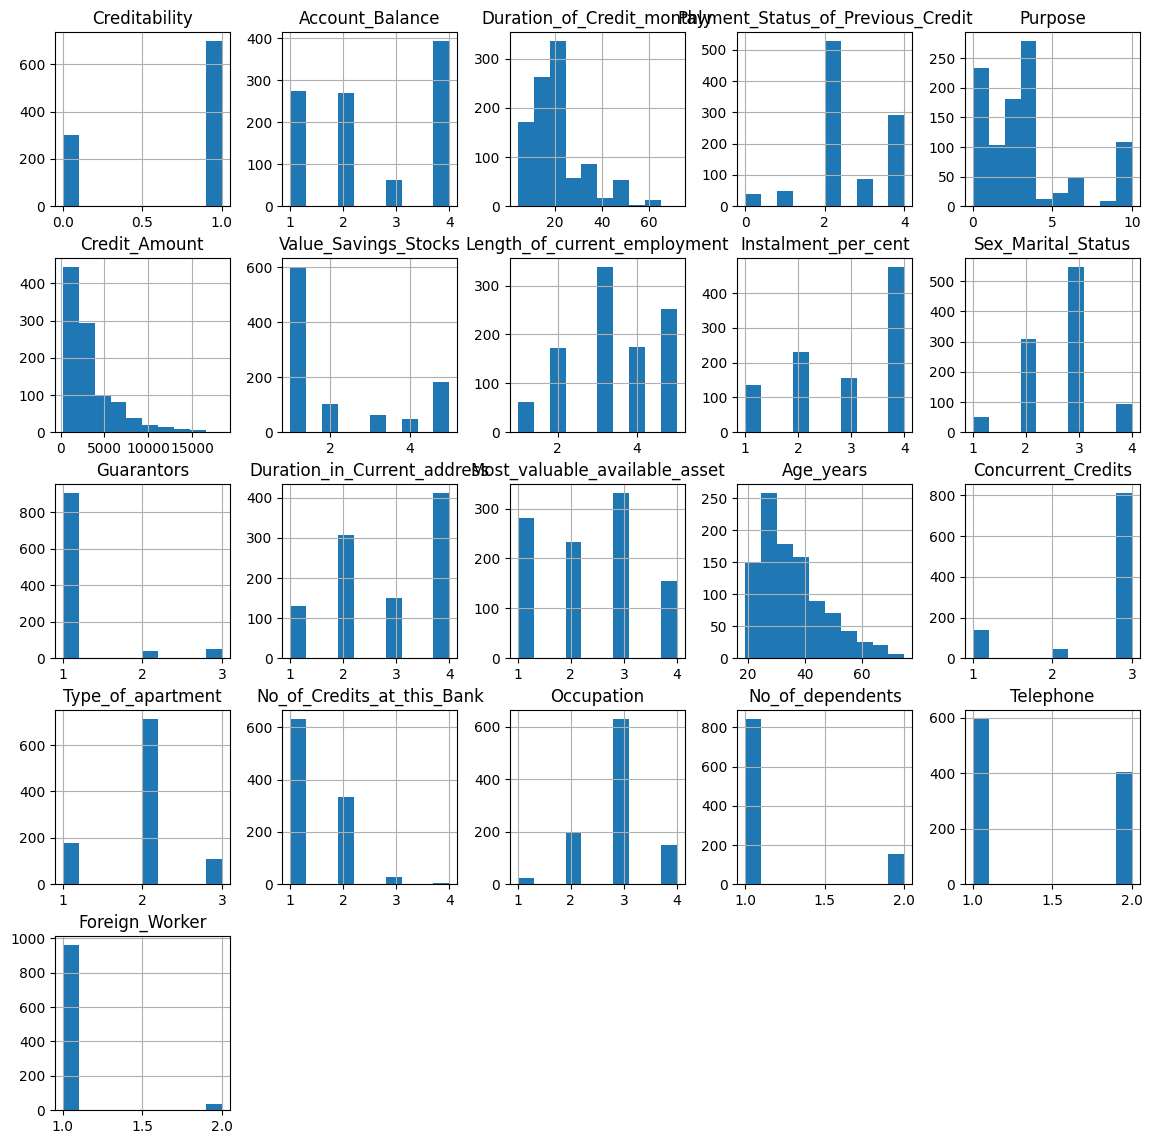

In [4]:
df_credit.hist(figsize=(14,14))

In [5]:
df_credit.nunique()

Creditability                          2
Account_Balance                        4
Duration_of_Credit_monthly            33
Payment_Status_of_Previous_Credit      5
Purpose                               10
Credit_Amount                        923
Value_Savings_Stocks                   5
Length_of_current_employment           5
Instalment_per_cent                    4
Sex_Marital_Status                     4
Guarantors                             3
Duration_in_Current_address            4
Most_valuable_available_asset          4
Age_years                             53
Concurrent_Credits                     3
Type_of_apartment                      3
No_of_Credits_at_this_Bank             4
Occupation                             4
No_of_dependents                       2
Telephone                              2
Foreign_Worker                         2
dtype: int64

In [6]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [7]:
describe_df(df_credit.iloc[:,:10]) 

COL_N,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,4,33,5,10,923,5,5,4,4
CARDIN (%),0.0,0.0,0.03,0.0,0.01,0.92,0.0,0.0,0.0,0.0


In [8]:
describe_df(df_credit.iloc[:,10:]) 

COL_N,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,3,4,4,53,3,3,4,4,2,2,2
CARDIN (%),0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
clasifica_variables(df_credit,10,0.02)

,nombre_variable,tipo_sugerido
0,Creditability,Binaria
1,Account_Balance,Categórica
2,Duration_of_Credit_monthly,Numérica Continua
3,Payment_Status_of_Previous_Credit,Categórica
4,Purpose,Numérica Discreta
5,Credit_Amount,Numérica Continua
6,Value_Savings_Stocks,Categórica
7,Length_of_current_employment,Categórica
8,Instalment_per_cent,Categórica
9,Sex_Marital_Status,Categórica


In [10]:
df_credit.Creditability.value_counts()

Creditability
1    700
0    300
Name: count, dtype: int64

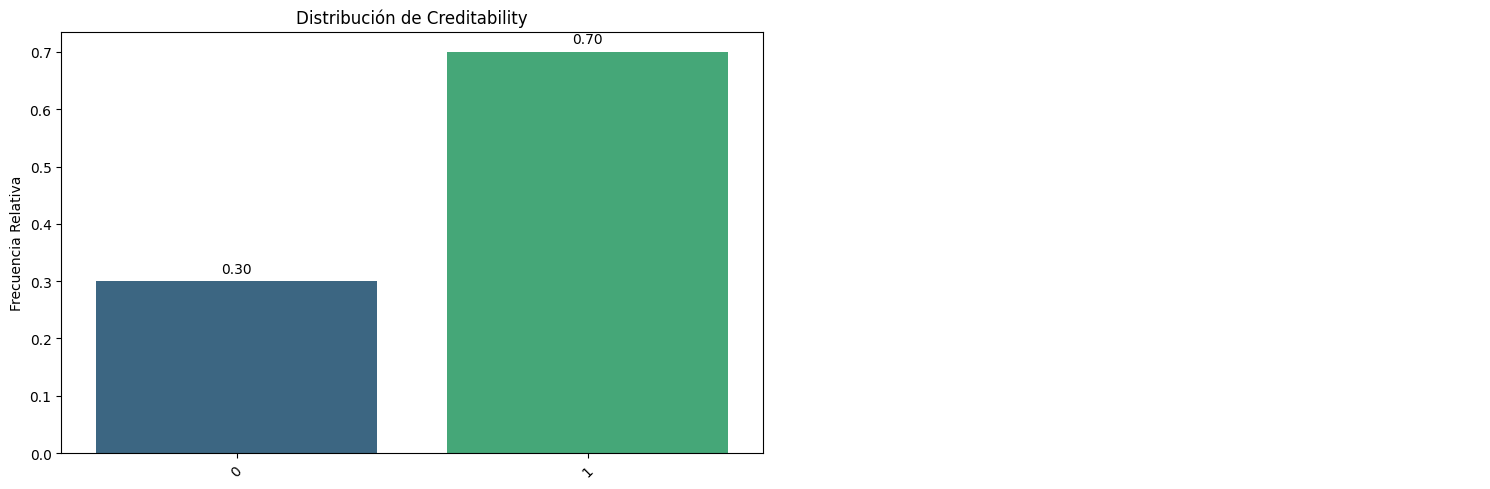

In [12]:
gc.pinta_distribucion_categoricas(df_credit,["Creditability"],relativa=True,mostrar_valores=True) # NO BALANCEADO

In [14]:
df_credit.Account_Balance.value_counts()

Account_Balance
4    394
1    274
2    269
3     63
Name: count, dtype: int64